In [1]:
import zipfile
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# 1) Chemin du ZIP
zip_path = "/content/healthcare_dataset.csv.zip"

# 2) Décompression dans /content
with zipfile.ZipFile(zip_path, "r") as z:
    z.extractall("/content")

# 3) Vérifier les fichiers extraits
print(os.listdir("/content"))


['.config', 'healthcare_dataset.csv', 'healthcare_dataset.csv.zip', 'drive', 'sample_data']


In [3]:

csv_path = "/content/healthcare_dataset.csv"

df = pd.read_csv(csv_path)
print("Shape :", df.shape)
print(df.head())
print(df.info())


Shape : (55500, 15)
            Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0

In [4]:
print("Shape :", df.shape)
print(df.head())
print(df.info())
display(df.describe(include="all").T)


Shape : (55500, 15)
            Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,55500,49992,DAvId muNoZ,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,55500.0,NaN,NaN,NaN,51.539459,19.602454,13.0,35.0,52.0,68.0,89.0
Gender,55500,2,Male,27774,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Blood Type,55500,8,A-,6969,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medical Condition,55500,6,Arthritis,9308,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date of Admission,55500,1827,2024-03-16,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Doctor,55500,40341,Michael Smith,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hospital,55500,39876,LLC Smith,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Insurance Provider,55500,5,Cigna,11249,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Billing Amount,55500.0,NaN,NaN,NaN,25539.316097,14211.454431,-2008.49214,13241.224652,25538.069376,37820.508436,52764.276736


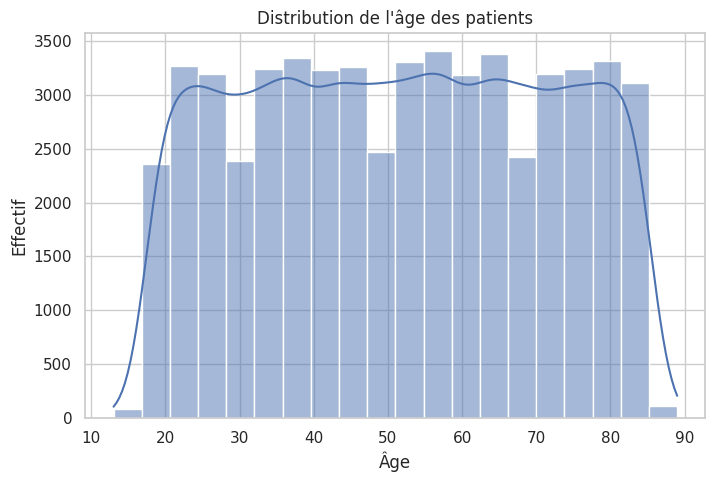

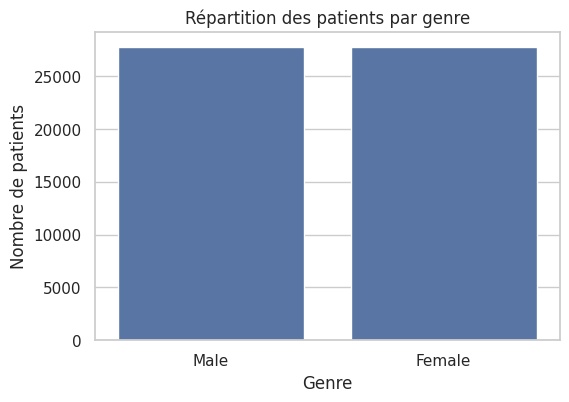

In [5]:
# Distribution de l'âge
plt.figure(figsize=(8,5))
sns.histplot(df["Age"], bins=20, kde=True)
plt.title("Distribution de l'âge des patients")
plt.xlabel("Âge")
plt.ylabel("Effectif")
plt.show()

# Répartition par genre
plt.figure(figsize=(6,4))
sns.countplot(x="Gender", data=df)
plt.title("Répartition des patients par genre")
plt.xlabel("Genre")
plt.ylabel("Nombre de patients")
plt.show()


Medical Condition
Arthritis       9308
Diabetes        9304
Hypertension    9245
Obesity         9231
Cancer          9227
Asthma          9185
Name: count, dtype: int64


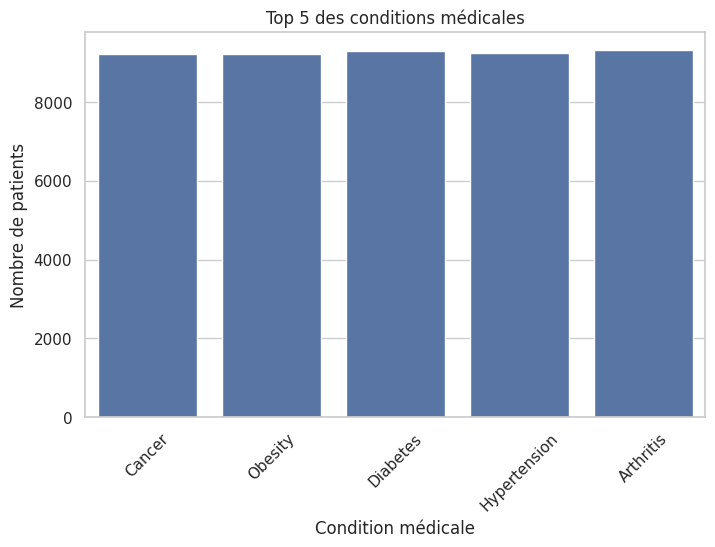

In [6]:
print(df["Medical Condition"].value_counts().head(10))

top_conditions = df["Medical Condition"].value_counts().head(5).index

plt.figure(figsize=(8,5))
sns.countplot(
    x="Medical Condition",
    data=df[df["Medical Condition"].isin(top_conditions)]
)
plt.title("Top 5 des conditions médicales")
plt.xlabel("Condition médicale")
plt.ylabel("Nombre de patients")
plt.xticks(rotation=45)
plt.show()


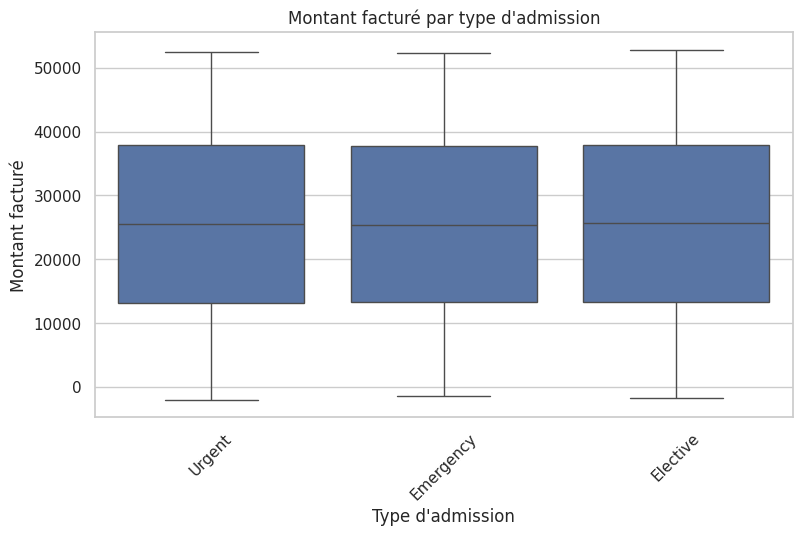

In [7]:
plt.figure(figsize=(9,5))
sns.boxplot(x="Admission Type", y="Billing Amount", data=df)
plt.title("Montant facturé par type d'admission")
plt.xlabel("Type d'admission")
plt.ylabel("Montant facturé")
plt.xticks(rotation=45)
plt.show()


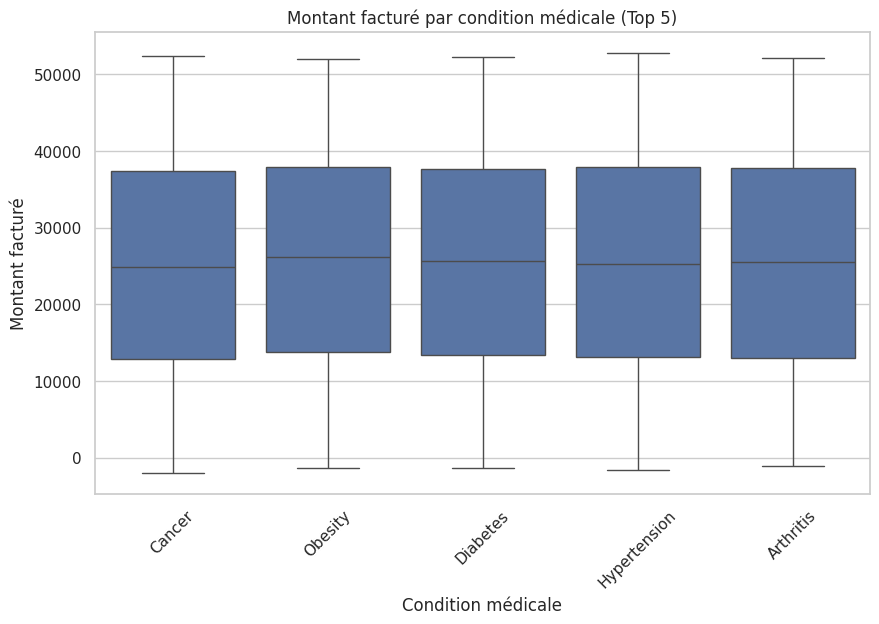

In [8]:
cond_subset = df[df["Medical Condition"].isin(top_conditions)]

plt.figure(figsize=(10,6))
sns.boxplot(x="Medical Condition", y="Billing Amount", data=cond_subset)
plt.title("Montant facturé par condition médicale (Top 5)")
plt.xlabel("Condition médicale")
plt.ylabel("Montant facturé")
plt.xticks(rotation=45)
plt.show()


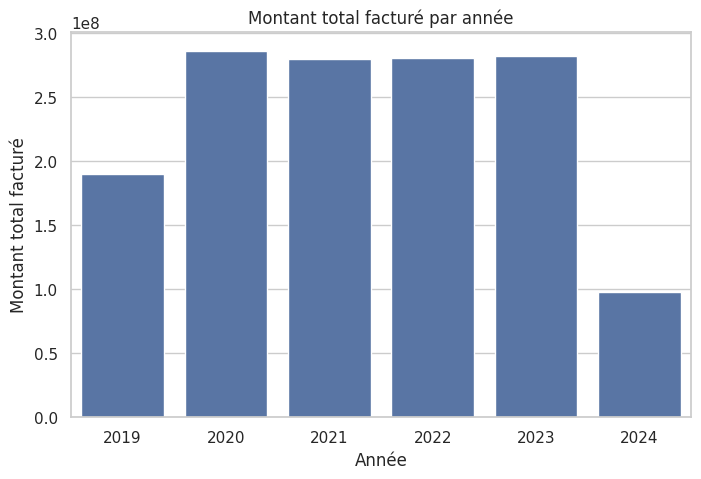

In [9]:
df["Date of Admission"] = pd.to_datetime(df["Date of Admission"], errors="coerce")
df["Year"] = df["Date of Admission"].dt.year

billing_by_year = df.groupby("Year")["Billing Amount"].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x="Year", y="Billing Amount", data=billing_by_year)
plt.title("Montant total facturé par année")
plt.xlabel("Année")
plt.ylabel("Montant total facturé")
plt.show()


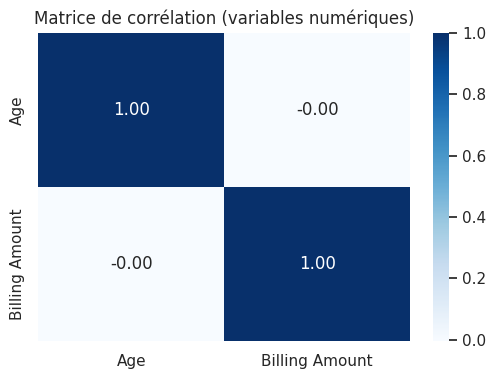

In [10]:
# Sélection de quelques variables numériques
num_cols = ["Age", "Billing Amount"]
if "Duration of Stay (Days)" in df.columns:
    num_cols.append("Duration of Stay (Days)")

# Matrice de corrélation
corr = df[num_cols].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f")
plt.title("Matrice de corrélation (variables numériques)")
plt.show()
